<a href="https://colab.research.google.com/github/vishomallaoli/dia-detect/blob/main/notebooks/543_diadetect_mle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Development

## Problem Definition

### Outcome
The goal is to predict the likelihood of a person having diabetes based on various demographic, health, and lifestyle features. This binary classification problem aims to accurately classify individuals as either diabetic or non-diabetic.

### Objective
To build a predictive model that determines whether an individual has diabetes or not, using medical, lifestyle, and demographic data. The model should assist in identifying individuals at risk, potentially supporting early intervention and preventive measures.

### Target Variable
- **Diabetes_binary**: The target variable for this classification task, where:
  - **1** indicates the presence of diabetes.
  - **0** indicates the absence of diabetes.

### Features
- The model will use a combination of medical, demographic, and lifestyle features, including:
  - **Medical Features**: BMI, Blood Pressure, Glucose, and Insulin levels.
  - **Lifestyle Features**: Physical activity, smoking status, alcohol consumption, and diet.
  - **Demographic Features**: Age, sex, education level, and income.

### Evaluation Metrics
Since this is a classification task, we will assess model performance using the following metrics:

- **Accuracy**: Measures overall correctness of the model but may be limited if there’s a class imbalance.
- **Precision**: Indicates the proportion of true positive predictions (diabetic) out of all positive predictions, showing how reliable the model is in predicting diabetes.
- **Recall**: Measures the proportion of true positives identified out of all actual positives, highlighting the model’s ability to detect diabetes cases.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced measure especially useful if there’s class imbalance.
- **ROC-AUC**: Reflects the trade-off between sensitivity and specificity, where a higher score (closer to 1) indicates better performance.

### Expected Outcome
By training and testing the model on this dataset, we expect to:
1. Accurately predict the diabetes status of individuals based on input features.
2. Identify key predictors that contribute to the model’s decisions.
3. Obtain a well-calibrated model that balances sensitivity and specificity, as indicated by a high ROC-AUC score.

The final model will provide a valuable tool for predicting diabetes risk, aiding in early detection and potential intervention.

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

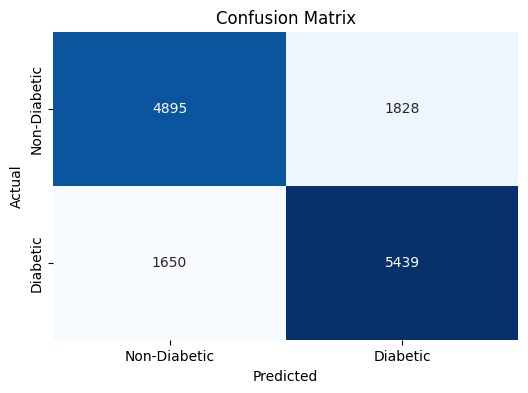


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.75      0.73      0.74      6723
    Diabetic       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

Baseline Model: Logistic Regression
Accuracy: 74.82%
Precision: 74.85%
Recall: 76.72%
F1 Score: 75.77%
ROC AUC Score: 74.77%


In [11]:
"""
  Baseline Model Development

  Deliverable: Build a simple model to establish baseline performance.
  Current Recommended Model: Logistic Regression.
"""
# Load the cleaned dataset
df = pd.read_csv('cleaned_df.csv')

# Define features and target variable
X = df.drop(columns=['Diabetes_binary'])  # Replace with the actual target variable name if different
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=200, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Evaluate performance and display metrics as percentages
print("Baseline Model: Logistic Regression")
print("Accuracy:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Precision:", f"{precision_score(y_test, y_pred) * 100:.2f}%")
print("Recall:", f"{recall_score(y_test, y_pred) * 100:.2f}%")
print("F1 Score:", f"{f1_score(y_test, y_pred) * 100:.2f}%")
print("ROC AUC Score:", f"{roc_auc_score(y_test, y_pred) * 100:.2f}%")

## Baseline Model Report: Logistic Regression

## Objective
The objective of this classification problem is to predict diabetes status based on various medical and demographic features. The target variable is `Diabetes_binary`, where:
- 1 = Diabetic
- 0 = Non-Diabetic

## Model Selection

### Chosen Model: Logistic Regression
Logistic Regression was selected as the baseline model for the following reasons:

1. **Simplicity and Interpretability**: Logistic Regression is a straightforward and interpretable model. It allows us to understand initial relationships between features and the target, which is valuable at the baseline stage.
  
2. **Performance**: Logistic Regression generally performs well in binary classification tasks, especially on datasets that are well-prepared and standardized.
  
3. **Computational Efficiency**: Logistic Regression is computationally inexpensive, allowing for rapid iteration and testing during the initial phases of model development.
  
4. **Compatibility with Evaluation Metrics**: Logistic Regression works effectively with metrics commonly used in classification, such as accuracy, precision, recall, F1-score, and ROC-AUC.

### Alternative Baseline Models
While Logistic Regression is a strong choice for the baseline, here are other models that could serve as potential baselines:

1. **Decision Tree**: Provides insight into feature importance and can handle non-linear relationships but may overfit without tuning.
2. **k-Nearest Neighbors (k-NN)**: A simple model that doesn't assume any specific distribution but may be computationally slow for larger datasets.
3. **Naive Bayes**: Useful for cases where feature independence is assumed, and it can provide strong results for some datasets.
4. **Dummy Classifier**: Predicting the majority class as a minimal baseline to ensure real models outperform this.

## Evaluation Metrics

The following metrics were used to evaluate the baseline model's performance:
- **Accuracy**: Measures the overall correctness of the model's predictions.
- **Precision**: Indicates the proportion of true positives out of all positive predictions.
- **Recall**: Reflects the model's ability to identify all true positives.
- **F1 Score**: The harmonic mean of precision and recall, balancing the two metrics.
- **ROC AUC**: A measure of the trade-off between sensitivity and specificity, providing a score between 0.5 and 1.

## Model Performance

### Confusion Matrix

|             | Predicted: Non-Diabetic | Predicted: Diabetic |
|-------------|--------------------------|----------------------|
| Actual: Non-Diabetic | 4895                 | 1828                 |
| Actual: Diabetic     | 1650                 | 5439                 |

### Classification Report

| Class           | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| Non-Diabetic    | 0.75      | 0.73   | 0.74     | 6723    |
| Diabetic        | 0.75      | 0.77   | 0.76     | 7089    |
| **Accuracy**    |           |        | **0.75** | **13812** |
| **Macro Avg**   | 0.75      | 0.75   | 0.75     | 13812   |
| **Weighted Avg**| 0.75      | 0.75   | 0.75     | 13812   |

### Summary of Baseline Performance

- **Accuracy**: 74.82%
- **Precision**: 74.85%
- **Recall**: 76.72%
- **F1 Score**: 75.77%
- **ROC AUC Score**: 74.77%

## Conclusion
The Logistic Regression model provided a strong baseline performance with an accuracy of 74.82% and a balanced precision-recall trade-off. The recall is slightly higher for the Diabetic class, which indicates the model's slight tendency to prioritize identifying diabetic cases. This baseline gives a solid foundation, and further improvements can be pursued by exploring more complex models or fine-tuning logistic regression parameters.